# Bank Marketing Conversion Prediction

## Introduction

The datasets used in this report are from direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. The aim of the phone calls, often consisting of several contacts to the same client, is to access the clients' willingness to subscribe the bank product.


The goal is to predict if the client will subscribe a bank product (term deposit).

## Dataset Description

Dataset source: 

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

There are two datasets: 1) bank-full.csv with all examples, time-ordered (from May 2008 to November 2010). 2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
## Load bank-full.csv

data_bank_full = pd.read_csv("bank-full.csv",sep=';')

In [3]:
data_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data_bank_full.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Explore the "Job" column

In [5]:
data_bank_full["job"].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [6]:
different_jobs = set()
for i in data_bank_full.index:
    different_jobs.add(data_bank_full.iloc[i]['job'])

print(different_jobs)

{'blue-collar', 'housemaid', 'retired', 'unemployed', 'technician', 'entrepreneur', 'services', 'management', 'admin.', 'student', 'self-employed', 'unknown'}


In [7]:
sns.set(style="darkgrid")

In [8]:
job_count = data_bank_full['job'].value_counts()

In [9]:
job_count.index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

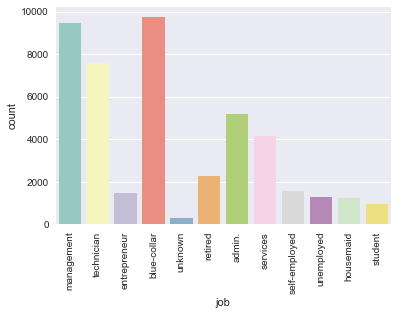

In [10]:
pl = sns.countplot(x='job',data=data_bank_full,palette="Set3")
_ = plt.setp(pl.get_xticklabels(), rotation=90)  # Rotate labels

### Convert categorical variables into dummy variables with pandas.get_dummies

In [11]:
cat_features = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','poutcome']
data_bank_full = pd.get_dummies(data_bank_full, columns=cat_features)

In [12]:
data_bank_full['y'] = (data_bank_full['y']=='yes').astype(int)

In [13]:
data_bank_full.head(10)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [14]:
## number of 'y = yes' / number of 'y = no'

(data_bank_full[data_bank_full['y']==1]['y'].count())/(data_bank_full[data_bank_full['y']==0]['y'].count())

0.1324833425179099

## Build Predictive Models

### Preparation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
selected_features = list(data_bank_full.columns.values)
target = 'y'
selected_features.remove(target)

In [17]:
X = data_bank_full[selected_features].values
y = data_bank_full[target].values

In [18]:
X

array([[  58, 2143,    5, ...,    0,    0,    1],
       [  44,   29,    5, ...,    0,    0,    1],
       [  33,    2,    5, ...,    0,    0,    1],
       ...,
       [  72, 5715,   17, ...,    0,    1,    0],
       [  57,  668,   17, ...,    0,    0,    1],
       [  37, 2971,   17, ...,    1,    0,    0]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, penalty='l2')
# C: Inverse of regularization strength; smaller C's specify stronger regularization

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

In [63]:
# Import metrics functions
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [64]:
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [65]:
%matplotlib inline

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred) 
#"Note: this implementation is restricted to the binary classification task."

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 3
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='brown', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.908668  0.904767
Accuracy   0.902649  0.898927
Precision  0.653098  0.654450
Recall     0.343973  0.343721
f1-score   0.450616  0.450721


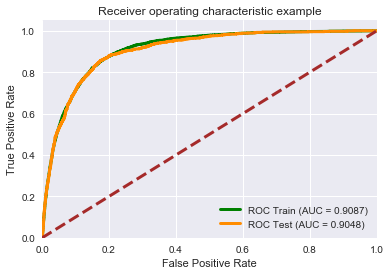

In [24]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### Estimated Coefficients

In [25]:
data_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
data_coeffs.columns = ['feature', 'coeff']
data_coeffs

,feature,coeff
49,poutcome_success,1.460953
42,month_mar,1.446813
45,month_oct,0.817380
46,month_sep,0.806114
37,month_dec,0.415150
15,job_student,0.397439
41,month_jun,0.360857
32,contact_cellular,0.321032
12,job_retired,0.291027
33,contact_telephone,0.207632


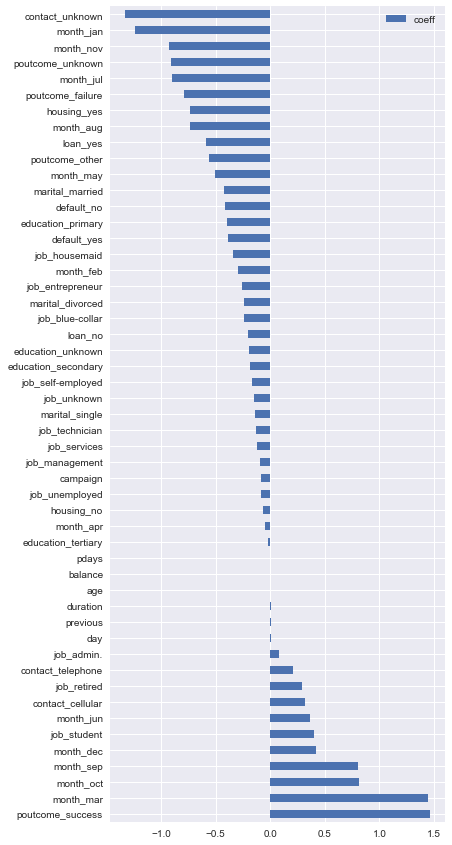

In [31]:
ax = data_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(data_coeffs['feature'])
plt.gcf().set_size_inches(6, 15)
plt.show()


In [32]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Gradient Boosting Trees

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

## Will try different parameters

In [77]:
clf = GradientBoostingClassifier(**parameters)

              train      test
metrics                      
AUC        0.965244  0.933596
Accuracy   0.941274  0.909875
Precision  0.823860  0.665072
Recall     0.628394  0.509624
f1-score   0.712973  0.577063


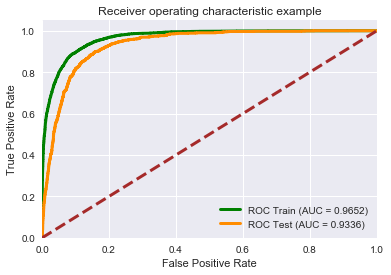

In [78]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

              train      test
metrics                      
AUC        0.830416  0.830186
Accuracy   0.783566  0.782152
Precision  0.307161  0.315878
Recall     0.688661  0.691109
f1-score   0.424835  0.433583


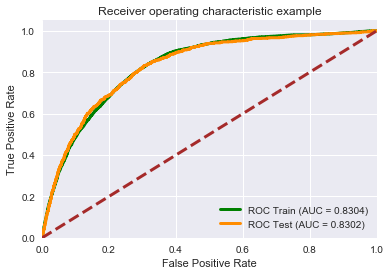

In [51]:
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-6, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(32,16,8), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [ ]:
train      test
metrics                      
AUC        0.830416  0.830186
Accuracy   0.783566  0.782152
Precision  0.307161  0.315878
Recall     0.688661  0.691109
f1-score   0.424835  0.433583

In [ ]:
train      test
metrics                      
AUC        0.844433  0.834964
Accuracy   0.885866  0.881234
Precision  0.649573  0.673469
Recall     0.036208  0.030247
f1-score   0.068592  0.057895

### Hyperparameters tuning: Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200],  # the number of trees
              'max_features': ['auto'], 
              'criterion': ['gini'],      # default = "gini"
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=3, scoring=acc_scorer)  #cv: the number of folds of cross-validation #
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.996038  0.929927
Accuracy   0.971909  0.906336
Precision  0.985061  0.690031
Recall     0.769652  0.406049
f1-score   0.864135  0.511252


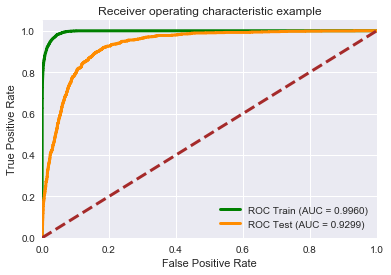

In [55]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Hyperparameter tuning: Gradient Boosting Tree

In [79]:
# Gradient Boosting Tree classifier. 
clf = GradientBoostingClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [25,50,100],
              'criterion' : ['friedman_mse'],
              'max_depth': [5,10],
              'max_features':['auto'],
              'min_samples_leaf': [2,10,20],
              'min_samples_split': [2],
              'learning_rate': [0.2]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=3, scoring=acc_scorer)  #cv: the number of folds of cross-validation #
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)